Programmieren 3 - Nebenläufigkeit

Peter Rösch, Fakultät für Informatik

Hochschule Augsburg, 2023/2024

# Nachträge und Ergänzungen 

In moodle gibt es folgende Neuigkeiten:
* Virtuelle Maschine für UTM (Apple Mx, arm64) unter [Software:Installation](https://moodle.hs-augsburg.de/mod/page/view.php?id=345359)
* Neue Hinweise zur [Arbeit auf dem Server arena](https://moodle.hs-augsburg.de/mod/page/view.php?id=325885)
* [Details zur Simulation](https://moodle.hs-augsburg.de/mod/page/view.php?id=345404)

## TSP - Implementierung

Eine mögliche Implementierung des TSP-Verfahrens (brute force) steht als Modul zur Verfügung.

In [3]:
import TSP
%matplotlib inline

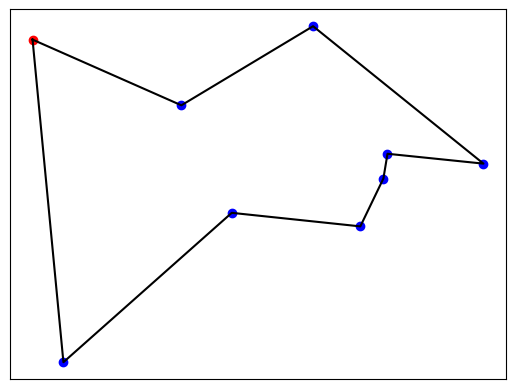

Länge: 3.2041


In [4]:
start_pos, nr_of_cities = 0, 9
end_pos = start_pos + nr_of_cities

result = TSP.shortest_closed_path(
    (TSP.staedte_positionen[start_pos],),
    TSP.staedte_positionen[start_pos + 1 : end_pos],
)
# print(result)
TSP.plot_closed_path(result[1])
print(f"Länge: {result[0]:.4f}")

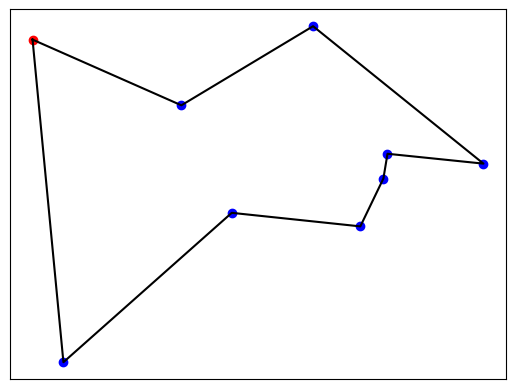

Länge: 3.2040912167463045


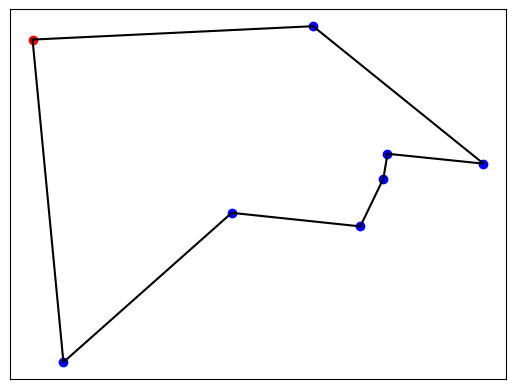

Länge: 3.098716113553138


In [5]:
# Aufruf mit starmap
import itertools

start_pos, nr_of_cities = 0, 9
end_pos = start_pos + nr_of_cities

arg_tuple = (
    (
        TSP.staedte_positionen[start_pos : start_pos + 1],
        TSP.staedte_positionen[start_pos + 1 : end_pos],
    ),
    (
        TSP.staedte_positionen[start_pos : start_pos + 1],
        TSP.staedte_positionen[start_pos + 1 : end_pos - 1],
    ),
)

result_list = list(itertools.starmap(TSP.shortest_closed_path, arg_tuple))

for result in result_list:
    TSP.plot_closed_path(result[1])
    print("Länge:", result[0])

# Nebeläufigkeit - Grundlagen

Frage: Was ist der Unterschied zwischen Nebenläufigkeit und Parallelität?

Antwort: Siehe [Universität Potsdam](http://ddi.cs.uni-potsdam.de/HyFISCH/Produzieren/SeminarDidaktik/Nebenlaeufigkeit/nebenlaeufig.htm)

Fragen:
* Was ist die zentrale Aussage des Amdahlschen Gesetzes?
* Welche nicht parallelisierbaren Vorgängen innerhalb von Funktionen oder Methoden kennen Sie?
* Welche zwei Klassen von Anwendungen lassen sich bezüglich des Amdahlschen Gesetzes grob definieren?

* Welche Art der Nebenläufigkeit beschleunigt welche Anwendung?

## Überblick 

| CPU-Last | Beispiele | Datensatzgröße | Methode | Klassifikation | 
| :-: | :-: | :-: | :-: | :-: |
| I/O (Warten) | Service, Dateisystem | Kleiner Teil des Hauptspeichers| asyncio | nebenläufig | 
| Rechnen | Verarbeitung vieler kleiner Bilder | Kleiner Teil des Hauptspeichers | multiprocessing | parallel |
| Rechnen | Verarbeitung von großen Bildern | Signifikanter Teil des Hauptspeichers | multithreading (z.B. mit numba) | parallel |

# Asyncio

Die folgenden Beispiele stammen aus dem Buch C. Hattingh: "Using Asyncio in Python", Packt Publishing (2020), das [online](https://learning.oreilly.com/library/view/using-asyncio-in/9781492075325/cover.html) über die Bibliothek verfügbar ist.

Die Dokumentation von asyncio finden Sie [hier](https://docs.python.org/3/library/asyncio.html).

## Seriell

In [6]:
%%file async_serial.py

url_tuple = ('http://www.heise.de', 'http://www.hs-augsburg.de', 'http://www.python.org')

import time

def verarbeite_daten(daten: str) -> int:
    # Berechnungen
    time.sleep(0.01)
    return len(daten)

def url_auswertung(url: str) -> int:
    # auslesen der Web-Seite
    time.sleep(1.0)
    return verarbeite_daten('Web-Content von ' + url)

def seiten_auswertung(urls: tuple[str]) -> int:
    ergebnis = 0
    for url in urls:
        ergebnis += url_auswertung(url)
    print(f'{ergebnis = }')

if __name__ == '__main__':
    seiten_auswertung(url_tuple)

Writing async_serial.py


In [7]:
%%bash
time python async_serial.py

ergebnis = 113



real	0m3,046s
user	0m0,016s
sys	0m0,000s


## Nebenläufig

Das Funktionsprinzip von asyncio ist [hier](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781617298660/files/OEBPS/Images/01-09.png) dargestellt.

In [9]:
%%file async_url.py

url_tuple = ('http://www.heise.de', 'http://www.hs-augsburg.de', 'http://www.python.org')

import time
import asyncio

def verarbeite_daten(d: str) -> int:
    # Berechnungen
    time.sleep(0.01)
    return len(d)

async def url_auswertung(url: str) -> int:
    # auslesen der Web-Seite
    await asyncio.sleep(1.0)
    return verarbeite_daten('Web-Content von ' + url)

async def seiten_auswertung(urls: tuple[str]) -> int:
    aufgaben = (url_auswertung(url) for url in urls)
    ergebnisse = await asyncio.gather(*aufgaben)
    ergebnis = sum(ergebnisse)
    print(f'{ergebnis = }')
    
if __name__ == '__main__':
    asyncio.run(seiten_auswertung(url_tuple))

Overwriting async_url.py


In [10]:
%%bash
time python3 async_url.py

ergebnis = 113



real	0m1,083s
user	0m0,044s
sys	0m0,008s


## Ausblick

Es gibt auf *asyncio* basierende Pakete für verschiedene Aufgaben, z.B. [streams](https://docs.python.org/3/library/asyncio-stream.html) für Netzwerk-I/O, [aiohttp](https://pypi.org/project/aiohttp) für HTTP-Server und -Clients, WebSockets etc., [asyncpg](https://pypi.org/project/asyncpg/) für Zugriffe auf PostgreSQL-Datenbanken.

# Parallelisierung - Einführung

Einen Artikel von H. Sutter mit dem Titel *The Free Lunch Is Over: A Fundamental Turn Toward Concurrency in Software* finden Sie [hier](http://www.gotw.ca/publications/concurrency-ddj.htm).

Nach *Amdahls Gesetz* können in Sie über die Bibliothek suchen oder im entsprechenden [Wikipedia-Artikel](http://de.wikipedia.org/wiki/Amdahlsches_Gesetz).

# Threads und Prozesse

* Was hat [dieses Bild](https://www.schick-seitenblicke.at/en/wp-content/uploads/sites/2/2012/11/MG_1422_kompr.jpg) mit Threads und Prozessen zu tun? Ein eher technisches Bild finden Sie [hier](http://www.fmc-modeling.org/category/projects/apache/amp/images/11-OS_Concepts/processes+threads_BD.gif).

* Welche Auswirkungen kaben die Unterschiede zwischen Threads und Prozessen auf die Programmierung?

* Was bedeutet die Abkürzung [GIL](https://wiki.python.org/moin/GlobalInterpreterLock)?

* Haben Sie schon einmal mit Posix Threads gearbeitet?

## Rückblick: POSIX-Threads

Im Archiv [pi_monte_carlo_ANSI_C.tar.bz2](https://moodle.hs-augsburg.de/pluginfile.php/429850/mod_folder/content/0/pi_monte_carlo_ANSI_C.tar.bz2?forcedownload=1) (Moodle) finden Sie eine Implementierung der Monte Carlo-Simulation in ANSI C, die POSIX-Threads zur Parallelisierung einsetzt. Zum Vergleich gibt es eine nicht parallelisierte Version unter *monteCarloUnitSphereSingle*. Die Programme können Sie wie folgt erstellen und ausführen:

    tar xf pi_monte_carlo_ANSI_C.tar.bz2
    cd pi_monte_carlo_ANSI_C
    source doit
    
Der Inhalt der Datei *doit* ist hier wiedergegeben:

    cd monteCarloUnitSphereSingle
    gcc -O3 -o monteCarloUnitSphereSingle monteCarloUnitSphereSingle.c -pthread -lm
    time ./monteCarloUnitSphereSingle 10 10
    cd monteCarloUnitSphereMulti
    gcc -O3 -o monteCarloUnitSphereMulti monteCarloUnitSphereMulti.c -pthread -lm
    time ./monteCarloUnitSphereMulti 10 10 4
    
Das letzte Argument beim Aufruf des Programms monteCarloUnitSphereMulti bezeichnet die Anzahl der Threads, die gestartet werden (in diesem Fall 4 Threads).



In einem Python-Programm können Prozesse, die eine bestimmte Funktion ausführen, direkt erzeugt und gestartet werden. Dazu verwenden wir das sehr mächtige Paket [multiprocessing](https://docs.python.org/3.10/library/multiprocessing.html).

In [12]:
%%file /tmp/proc.py
import multiprocessing, os
from time import sleep

def function(name):
    sleep(1)
    print('pid:', os.getpid())
    print('hello', name)
    
# Die folgende Zeile ist unter Windows unbedingt notwendig!
if __name__ == '__main__':
    print('main pid:', os.getpid())
    p1 = multiprocessing.Process(target=function, args=('p1',))
    p2 = multiprocessing.Process(target=function, args=('p2',))   
    p1.start()
    p2.start()  
    p1.join()
    p2.join()
    print('done')

Overwriting /tmp/proc.py


In [13]:
%run /tmp/proc

main pid: 77724
pid: 78861
pid:hello  p178862

hello p2
done


<Figure size 640x480 with 0 Axes>

Prozesse können über *pipes* miteinander kommunizieren.

In [14]:
import multiprocessing


def f(p):
    while True:
        message = p.recv()
        if message[0] == "getLost":
            p.send("finishing")
            break
        else:
            p.send([message, "received!"])


if __name__ == "__main__":
    myEnd, otherEnd = multiprocessing.Pipe()
    process = multiprocessing.Process(target=f, args=(otherEnd,))
    process.start()
    for arg in ((1, 2, 3), ("hallo",), (3, "test"), ("getLost",)):
        myEnd.send(arg)
        print(myEnd.recv())

[(1, 2, 3), 'received!']
[('hallo',), 'received!']
[(3, 'test'), 'received!']
finishing


# Das Modul multiprocessing - Details

Die Anzahl der Prozesse, die gestartet wird, sollte von der Anzahl der vorhandenen CPU-Kerne abhängen:

In [15]:
import multiprocessing
import math

nrOfCores = multiprocessing.cpu_count()
print("nrOfCores:", nrOfCores)

nrOfCores: 16


Was hat [dieses Bild](https://d2gg9evh47fn9z.cloudfront.net/800px_COLOURBOX2703226.jpg) mit der parallelisierten Abarbeitung von Aufgaben zu tun?

Das folgende Beispiel zeigt die parallelisierte Berechnung von Quadratzahlen.

In [16]:
def f(qIn, qOut):
    while True:
        x = qIn.get()
        result = x * x
        qOut.put(result)
        qIn.task_done()


if __name__ == "__main__":
    argumentQueue = multiprocessing.JoinableQueue()
    resultQueue = multiprocessing.Queue()
    nrOfProcesses = multiprocessing.cpu_count()
    processes = [
        multiprocessing.Process(target=f, args=(argumentQueue, resultQueue))
        for _ in range(nrOfProcesses)
    ]
    for i in range(0, 10):
        argumentQueue.put(i)
    for p in processes:
        p.start()
    argumentQueue.join()
    for p in processes:
        p.terminate()
    for i in range(10):
        print(resultQueue.get(), end=" ")

0 1 4 9 16 25 36 49 64 81 

Wie können wir den TSP-Algorithmus nach diesem Muster parallelisieren?

Um den TSP so zu parallelisieren, muss zunächst eine Liste mit Argumenten erstellt werden, die die Teilaufgaben definiert:

In [17]:
def create_argument_list(path_completed, path_ahead, r_depth, l):
    if len(path_completed) == r_depth:
        l.append((path_completed, path_ahead))
    else:
        for i in range(len(path_ahead)):
            create_argument_list(
                path_completed + (path_ahead[i],),
                path_ahead[:i] + path_ahead[i + 1 :],
                r_depth,
                l,
            )

Vorbereitungen für die parallelisierte Berechnung des Rundwegs durch *nr_of_cities* Städte:

In [18]:
nr_of_cities = 10
r_depth = 3
l = []
create_argument_list(
    (TSP.staedte_positionen[0],),
    TSP.staedte_positionen[1:nr_of_cities],
    r_depth,
    l,
)

In [19]:
l[:2]

[(((0.010319427306382911, 0.8956251389386756),
   (0.6999898714299346, 0.42254500074835377),
   (0.4294574582950912, 0.4568408794115657)),
  ((0.6005454852683483, 0.9295407203370832),
   (0.9590226056623925, 0.581453646599427),
   (0.748521134122647, 0.5437775417153159),
   (0.7571232013282426, 0.606435031856663),
   (0.07528757443413125, 0.07854082131763074),
   (0.32346175150639334, 0.7291706487873425),
   (0.012935451483722882, 0.974440252089956))),
 (((0.010319427306382911, 0.8956251389386756),
   (0.6999898714299346, 0.42254500074835377),
   (0.6005454852683483, 0.9295407203370832)),
  ((0.4294574582950912, 0.4568408794115657),
   (0.9590226056623925, 0.581453646599427),
   (0.748521134122647, 0.5437775417153159),
   (0.7571232013282426, 0.606435031856663),
   (0.07528757443413125, 0.07854082131763074),
   (0.32346175150639334, 0.7291706487873425),
   (0.012935451483722882, 0.974440252089956)))]

In [20]:
len(l)

72

Die Worker-Funktion:

In [21]:
import TSP


def worker_TSP(q_in, q_out):
    while True:
        arguments = q_in.get()
        result = TSP.shortest_closed_path(*arguments)
        q_out.put(result)
        q_in.task_done()

Berechnung unter Verwendung von *Queues*:

In [22]:
%%timeit
in_queue = multiprocessing.JoinableQueue()
result_queue = multiprocessing.Queue()

processes = []
for i in range(nrOfCores):
    p = multiprocessing.Process(target = worker_TSP, 
                                args = (in_queue, result_queue))
    processes.append(p)
    p.start()
    
for parameter_set in l:
    in_queue.put(parameter_set)
    
in_queue.join()

result_list = []
while not result_queue.empty():
    result_list.append(result_queue.get())

min_path = min(result_list)

for p in processes:
    p.terminate()

114 ms ± 467 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Was vermuten Sie hinter dem Begriff [Worker Pool](http://www.slate.com/content/dam/slate/blogs/quora/2016/07/09/is_it_better_to_be_a_worker_bee_or_a_killer_bee_on_the_job/51341806-top-view-of-worker-bees-that-were-breed-by-self-taught.jpg.CROP.promo-xlarge2.jpg)?

Wieso ist der Befehl *map* für die Parallelisierung auf Prozess-Ebene sehr hilfreich?

Nicht-parallele Version:

In [23]:
import itertools

In [24]:
%%timeit
l2 = itertools.starmap(TSP.shortest_closed_path, l)
resultSerial = min(l2)

649 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Parallelisierte Version:

In [25]:
%%timeit
process_pool = multiprocessing.Pool(processes = nrOfCores)
l2 = process_pool.starmap(TSP.shortest_closed_path, l)
result_parallel = min(l2)
process_pool.close() 

119 ms ± 864 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Einfaches Multithreading mit numba (Ausblick)

In [26]:
%%file numpy_operation_serial.py

import numpy as np
import timeit

def f_serial(a: np.array) -> np.array:
    b = a*2.3 + a**3.1 + np.log(np.abs(a) + 1)
    return b

if __name__ == '__main__':
    a = np.random.uniform(0, 1, size=10**8)
    t = timeit.timeit('f_serial(a)', number=2, globals=globals())
    print(f'Zeit: {t:.3}s')

Writing numpy_operation_serial.py


In [27]:
%run numpy_operation_serial

Zeit: 3.35s


In [28]:
%%file numpy_operation_parallel.py

import numpy as np
import numba
import timeit

@numba.njit(parallel=True)
def f_parallel(a: np.array) -> np.array:
    b = a*2.3 + a**3.1 + np.log(np.abs(a) + 1)
    return b

if __name__ == '__main__':
    a = np.random.uniform(0, 1, size=10**8)
    t = timeit.timeit('f_parallel(a)', number=2, globals=globals())
    print(f'Zeit: {t:.3}s')

Writing numpy_operation_parallel.py


In [29]:
%run numpy_operation_parallel

Zeit: 0.743s


# Ausblick: SIMD-Parallelisierung

Aktuelle Prozessoren besitzen Erweiterungen (AVX, AVX2, AVX-512), die die Anwendung einer Operation (z.B. Multiplikation) auf mehrere Zahlen gleichzeitig unterstützen. Einen Überblick finden Sie [hier](https://de.wikipedia.org/wiki/Advanced_Vector_Extensions).

Zu beachten ist, dass die Verwendung der Erweiterung zu einer Senkung der Taktrate der CPU führen kann, siehe [Zusammenstellung für Intel Skylake](https://www.pcgameshardware.de/Skylake-X-Codename-266252/News/Takt-Reduzierung-AVX2-AVX512-1238210)

Eine einfache Möglichkeit, diese Erweiterungen von Python aus zu verwenden, bietet [numba](https://numba.pydata.org).

# Aufgaben, Abgabe 21.11. und 23.11.2022¶

## asyncio

1. Was bewirken die Befehle *async* und *await* konkret in der Anwendung *sample_client.py*?
1. Welche Vorteile bietet die Verwendung des *asyncio*-Pakets im Vergleich zur Verwendung von Python-*Threads*?

## Threads

1. Schauen Sie sich die gegebenen C-Programme (Abschnitt 5.1) genauer an und finden Sie heraus, wie die Synchronisation stattfindet.
1. Compilieren und starten Sie die C-Programme und analysieren Sie die Ausgabe des Programms. Was bedeuten die Begriffe *real, user* und *sys* und wie erklären Sie sich die Unterschiede zwischen den verschiedenen Implementierung bezüglich der Ausgaben von *time*?
1. Melden Sie sich mit Ihrer Rechenzentrums-Kennung per *ssh* auf dem Rechner *login.rz.hs-augsburg.de* an und von dort aus per *ssh* auf *rechentier.informatik.hs-augsburg.de*. Wiederholen Sie Ihre Versuche auf *rechentier* (16  Kerne / 32 Threads).

## Das Module multiprocessing

1. Arbeiten Sie die vorgegebenen Beispiele nochmals durch und stellen Sie ggf. Fragen an den Dozenten.
1. Starten Sie die parallelisierten TSP-Berechnungen auf den Labor-Rechnern oder auf *rechentier* und vergleichen Sie die Rechenzeiten mit der der nicht parallelisierten Version. 
1. Warum wird die Aufgabe nicht in genau so viele Teilaufgaben unterteilt wie man CPU-Kerne hat?
1. Was bewirkt der Befehl *in_queue.join()*?
1. Erstellen Sie zwei parallelisierte Implementierung ihrer $\pi$-Bestimmung nach Monte Carlo, wovon eine auf *map* und eine auf *Queues* basiert. Vergleichen Sie die Rechenzeiten mit denen ihrer bisherigen Version. Wurden Ihre Erwartungen bezüglich der Beschleunigung erfüllt?

# Überprüfung

1. In welchen Fällen bringt echte Parallelisierung einen Vorteil gegenüber vom Event Loop verwalteten Koroutinen (*asyncio*)?
1. Was bedeutet *Synchronisation* im Zusammenhang mit der Parallelisierung von Computerprogrammen? (max. vier Sätze)
1. Erklären Sie die wesentlichen Unterschiede zwischen Prozessen und Threads. (max. vier Sätze)
1. Nennen Sie zwei wichtige Gründe, warum die parallelisierte Version eines Programms auf einem Rechner mit N Prozessor-Kernen in der Regel nicht um einen Faktor N schneller läuft. (ca. zwei Sätze)